In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [381]:
# Importing Dataset

In [382]:
# Mobile Phone data
data = pd.read_csv('/content/mobile_price_classification (1).csv')
data.head(10)

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [383]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [384]:
# Exploratory Data Analysis (EDA)

In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [386]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [387]:
data.shape

(2000, 21)

In [388]:
# Pre-Processing

# Handling the missing values (Nan)

In [389]:
data.isna().sum()  # Trying to find number of null values in each column

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [390]:
# Since there are no null values, we move onto handling outliers

In [391]:
# Outliers

In [392]:
data.dtypes

battery_power       int64
bluetooth           int64
clock_speed       float64
dual_sim            int64
front_cam           int64
4G                  int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
primary_camera      int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range         int64
dtype: object

In [393]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Text(0.5, 1.0, 'talk_time')

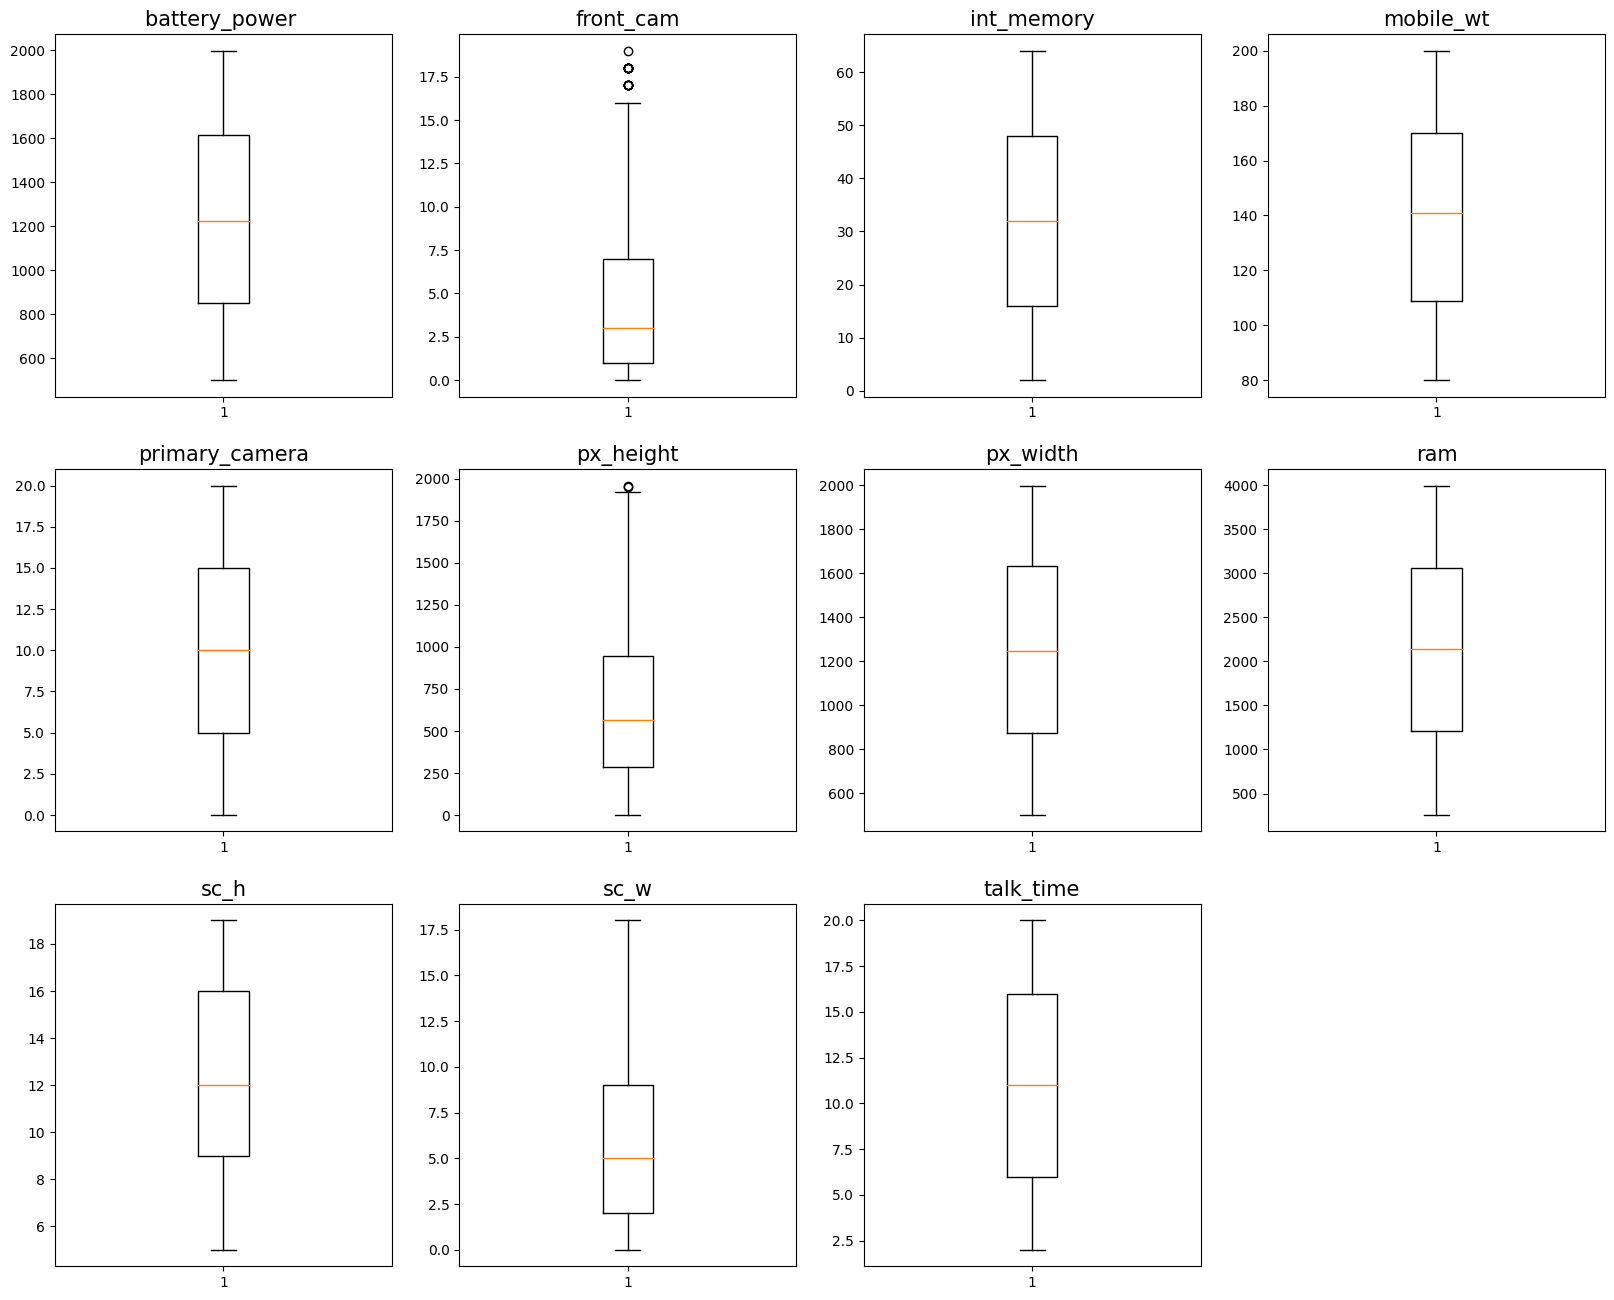

In [394]:
# We'll check outliers for 'battery_power', 'front_cam', 'int_memory', 'mobile_wt', 'primary_camera', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'

plt.figure(figsize=(20,16))
plt.subplot(3,4,1)
plt.boxplot(data['battery_power'])
plt.title('battery_power ', fontsize=15)

plt.subplot(3,4,2)
plt.boxplot(data['front_cam'])
plt.title('front_cam', fontsize=15)

plt.subplot(3,4,3)
plt.boxplot(data['int_memory'])
plt.title('int_memory', fontsize=15)

plt.subplot(3,4,4)
plt.boxplot(data['mobile_wt'])
plt.title('mobile_wt', fontsize=15)

plt.subplot(3,4,5)
plt.boxplot(data['primary_camera'])
plt.title('primary_camera', fontsize=15)

plt.subplot(3,4,6)
plt.boxplot(data['px_height'])
plt.title('px_height', fontsize=15)

plt.subplot(3,4,7)
plt.boxplot(data['px_width'])
plt.title('px_width', fontsize=15)

plt.subplot(3,4,8)
plt.boxplot(data['ram'])
plt.title('ram', fontsize=15)

plt.subplot(3,4,9)
plt.boxplot(data['sc_h'])
plt.title('sc_h', fontsize=15)

plt.subplot(3,4,10)
plt.boxplot(data['sc_w'])
plt.title('sc_w', fontsize=15)

plt.subplot(3,4,11)
plt.boxplot(data['talk_time'])
plt.title('talk_time', fontsize=15)

In [395]:
# 'front_cam' , 'px_height' have outliers and need to be modified

In [396]:
# front_cam
Q1 = data['front_cam'].quantile(0.25)
Q2 = data['front_cam'].quantile(0.50)
Q3 = data['front_cam'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-8.0 16.0


In [397]:
data['front_cam'] = np.where(data['front_cam'] >= high, high, np.where(data['front_cam'] <= low, low, data['front_cam']))

In [398]:
# px_height
Q1 = data['px_height'].quantile(0.25)
Q2 = data['px_height'].quantile(0.50)
Q3 = data['px_height'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-714.0 1944.0


In [399]:
data['px_height'] = np.where(data['px_height'] >= high, high, np.where(data['px_height'] <= low, low, data['px_height']))

In [400]:
# Plotting the dataset after removal of outliers

Text(0.5, 1.0, 'talk_time')

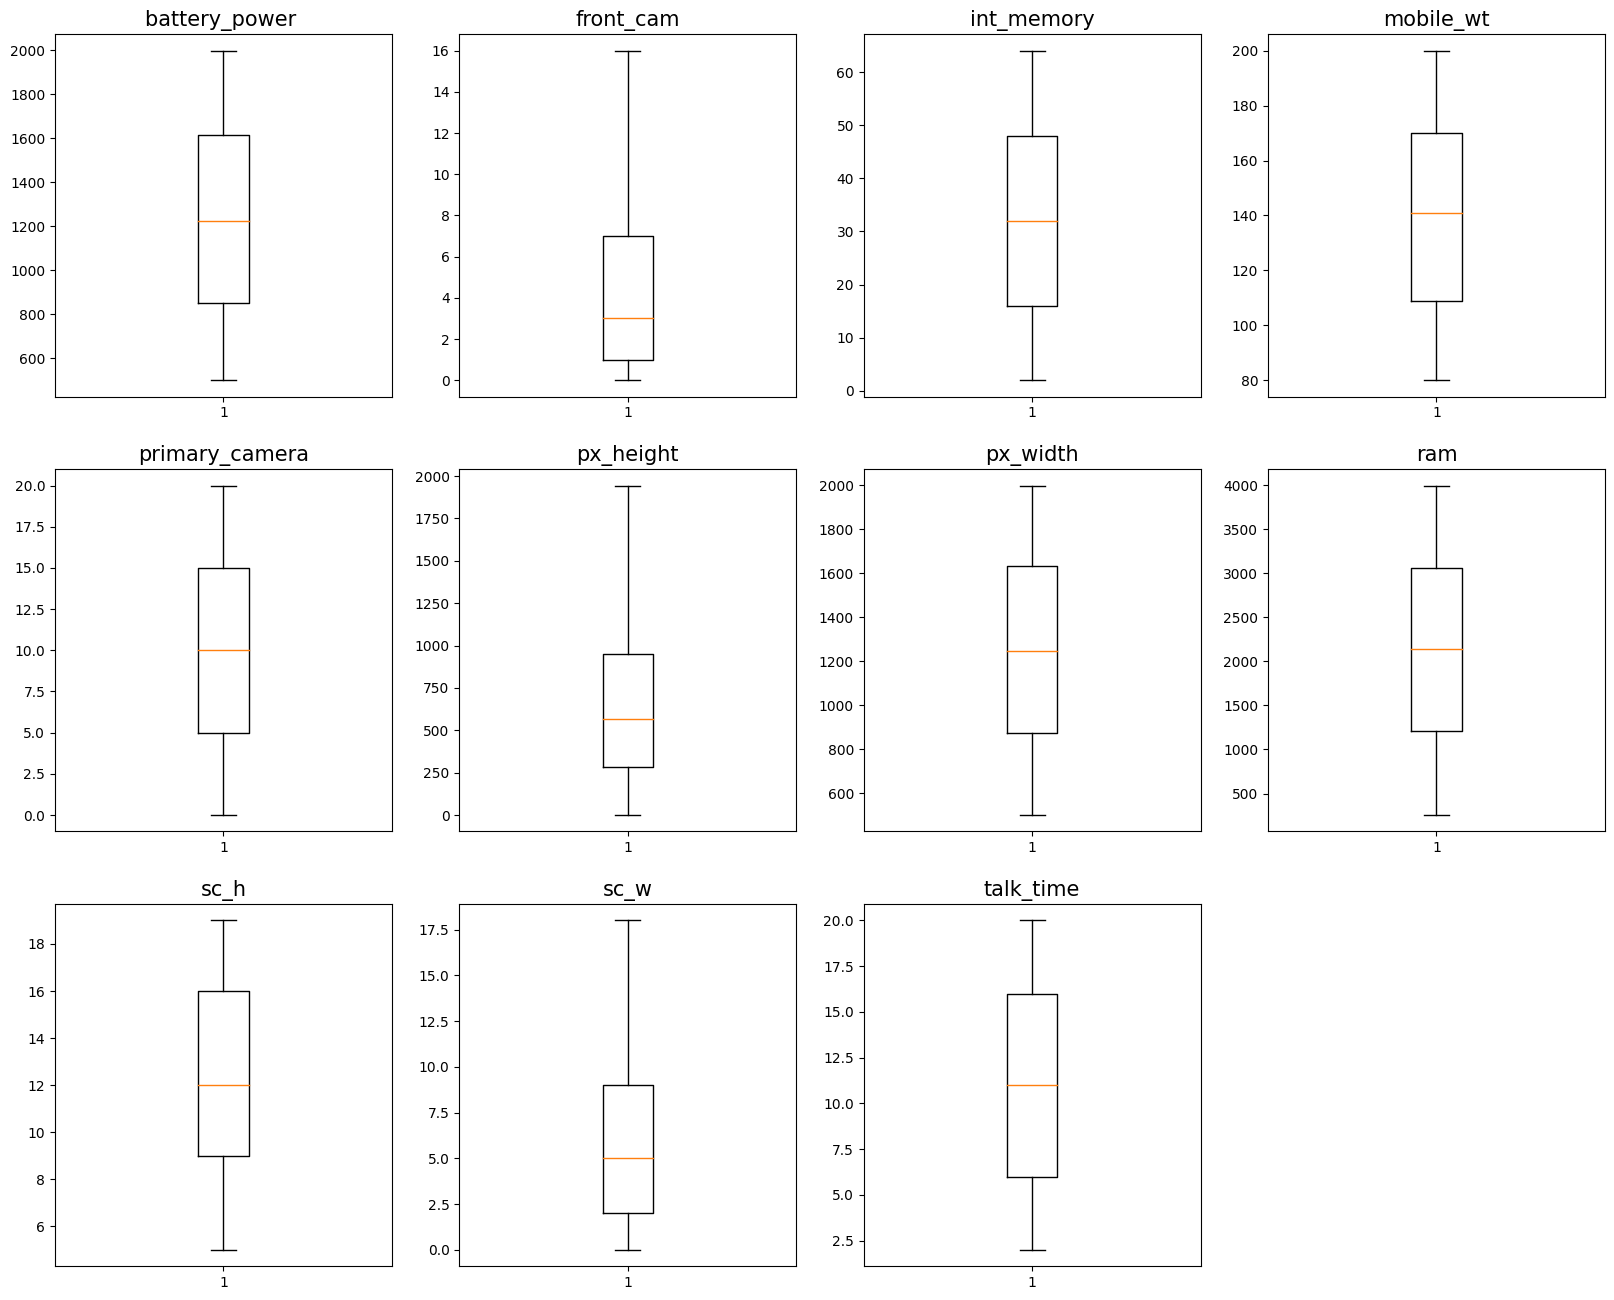

In [401]:
plt.figure(figsize=(20,16))
plt.subplot(3,4,1)
plt.boxplot(data['battery_power'])
plt.title('battery_power ', fontsize=15)

plt.subplot(3,4,2)
plt.boxplot(data['front_cam'])
plt.title('front_cam', fontsize=15)

plt.subplot(3,4,3)
plt.boxplot(data['int_memory'])
plt.title('int_memory', fontsize=15)

plt.subplot(3,4,4)
plt.boxplot(data['mobile_wt'])
plt.title('mobile_wt', fontsize=15)

plt.subplot(3,4,5)
plt.boxplot(data['primary_camera'])
plt.title('primary_camera', fontsize=15)

plt.subplot(3,4,6)
plt.boxplot(data['px_height'])
plt.title('px_height', fontsize=15)

plt.subplot(3,4,7)
plt.boxplot(data['px_width'])
plt.title('px_width', fontsize=15)

plt.subplot(3,4,8)
plt.boxplot(data['ram'])
plt.title('ram', fontsize=15)

plt.subplot(3,4,9)
plt.boxplot(data['sc_h'])
plt.title('sc_h', fontsize=15)

plt.subplot(3,4,10)
plt.boxplot(data['sc_w'])
plt.title('sc_w', fontsize=15)

plt.subplot(3,4,11)
plt.boxplot(data['talk_time'])
plt.title('talk_time', fontsize=15)

In [402]:
# Encoding

# There is no need to perform encoding as all the columns are already numerical value columns

In [403]:
# Scaling
# Feature scaling only in independent features and non-target columns. But in our case there is no target column
# We'll do scaling for for 'battery_power', 'front_cam', 'int_memory', 'mobile_wt', 'primary_camera', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'


In [404]:
X = data.copy()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [405]:
# We split the data into x and y where x stands for the feature variables and y stands for target variable
# This is used for scaling as well as later on for train_test_split

In [406]:
x = data[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]      # Independent features
y = data['price_range']    # Target column

x.loc[:,['battery_power', 'front_cam', 'int_memory', 'mobile_wt', 'primary_camera', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']] = sc.fit_transform(x[['battery_power', 'front_cam', 'int_memory', 'mobile_wt', 'primary_camera', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']])

<ipython-input-406-c2a7aa80dfe8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['battery_power', 'front_cam', 'int_memory', 'mobile_wt', 'primary_camera', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']] = sc.fit_transform(x[['battery_power', 'front_cam', 'int_memory', 'mobile_wt', 'primary_camera', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']])


In [407]:
x.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,0,2.2,0,-0.766948,0,-1.380644,0.6,1.349249,2,-1.305750,-1.409023,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1
1,-0.495139,1,0.5,1,-0.999780,1,1.155024,0.7,-0.120059,3,-0.645989,0.585842,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0
2,-1.537686,1,0.5,1,-0.534116,1,0.493546,0.9,0.134244,5,-0.645989,1.392805,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0
3,-1.419319,1,2.5,0,-0.999780,0,-1.215274,0.8,-0.261339,6,-0.151168,1.286863,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0
4,1.325906,1,1.2,0,2.027033,1,0.658915,0.6,0.021220,2,0.673534,1.268830,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0


In [408]:
# Artificial Neural Network with hyperparameter tuning


In [409]:
!pip install scikeras
!pip install np_utils

In [410]:
!pip install keras

In [422]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.regularizers import l1,l2
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from keras import utils

In [412]:
# Define the model architecture

def create_model(layers, activation):
        model= Sequential()
        for i, nodes in enumerate(layers):
            if i==0:
                model.add(Dense(nodes, input_dim=x_train.shape[1]))
                model.add(Activation(activation))
            else:
                model.add(Dense(nodes))
                model.add(Activation(activation))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model


In [413]:
# Splitting the dataset into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [414]:
from sklearn.model_selection import GridSearchCV
import numpy as np
seed = 1
np.random.seed(seed)

In [415]:
# Define the grid search parameters

layers=[[20],[40,20], [45, 30, 15]]
activations = ['sigmoid','relu','tanh']
optimizer = ['Adam', 'RMSprop', 'Adagrad']

param_grid = dict(layers=layers, activation=activations, batch_size=[128, 256], epochs=[30])

In [416]:
# Define the model
# Create a pipeline with the model creation function and GridSearchCV

model= KerasClassifier(model=create_model, verbose=0, activation='relu', layers=20)

In [417]:
# Grid SearchCV

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid_result= grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(128, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(128, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(128, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  re

In [418]:
# Get the best parameters and their score

best_params = grid_result.best_params_
best_score = grid_result.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")


Best parameters: {'activation': 'sigmoid', 'batch_size': 128, 'epochs': 30, 'layers': [20]}
Best score: 0.246875


In [426]:
# Evaluate the model's performance on the test set
y_pred = grid_result.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


print("Confusion Matrix:", confusion_matrix(y_test,y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.2625
Confusion Matrix: [[105   0   0   0]
 [ 91   0   0   0]
 [ 92   0   0   0]
 [112   0   0   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.26      1.00      0.42       105
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00       112

    accuracy                           0.26       400
   macro avg       0.07      0.25      0.10       400
weighted avg       0.07      0.26      0.11       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [427]:
# We have been able to identify the best activation, epochs, layers and batch size with the help of GridSearchCV

In [429]:
accuracy_means = grid_result.cv_results_["mean_test_score"]
accuracy_stds = grid_result.cv_results_["std_test_score"]

In [430]:
parameters = grid_result.cv_results_['params']

In [431]:
for p in range(len(parameters)):
    print(accuracy_means[p], accuracy_stds[p])

0.246875 0.0
0.246875 0.0
0.246875 0.0
0.246875 0.0
0.246875 0.0
0.246875 0.0
0.246875 0.0
0.246875 0.0
0.246875 0.0
0.246875 0.0
0.246875 0.0
0.246875 0.0
